<a href="https://colab.research.google.com/github/hws2002/MachineLearning_PytorchNScikitLearn/blob/master/chapter12/chapter12_5_activation_fn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# 12.5 다층 신경망의 활성화 함수 선택
기술적으로 미분 가능하다면 어떠한 함수라도 다층 신경망의 활성화 함수로 사용할 수 있음  


## 12.5.1 로지스틱 함수 요약
2차원 데이터 포인트 x와 가중치 벡터로 구성된 모델을 예로 시그모이드 함수에 대해 알아보자

In [ ]:
X = np.array([1,   1.4,  2.5])
w = np.array([0.4, 0.3,  0.5])

def net_input(X,w):
  return np.dot(X,w)

def logistic(z):
  return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X,w):
  z = net_input(X,w)
  return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(X,w))

P(y=1|x) = 0.888


다음 코드에서처럼 여러 개의 로지스틱 활성화 유닛으로 구성된 출력층은 의미있게 해석할 만한 확률 값을 만들지 못함

In [ ]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])
A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('최종 입력 : \n' ,Z)
print('유닛 출력 : \n', y_probas)

최종 입력 : 
 [1.78 0.76 1.65]
유닛 출력 : 
 [0.85569687 0.68135373 0.83889105]


하지만 클래스 레이블을 예측하기 위해서라면 큰 문제는 아님.  
이들 중 가장 큰 값을 선택하면 되기 때문

In [ ]:
y_class = np.argmax(y_probas, axis = 0)
print(' 예측 클래스 레이블 : %d' % y_class)

 예측 클래스 레이블 : 0


하지만 어떤 경우에는 다중 클래스 예측 문제에서 의미 있는 클래스 확률을 계산할 필요가 있음 -> softmax 함수

## 12.5.2 소프트맥스 함수를 사용한 다중 클래스 확률 예측
하나의 클래스를 찾는 대신 각 클래스의 확률을 반환하므로 다중 클래스 환경 (multinomial logistic regression)에서 의미 있는 클래스 확률을 계산할 수 있음


In [ ]:
# softmax 함수의 동적과정을 직접 파이썬으로 만들어 보자
def softmax(z):
  return np.exp(z) / np.sum(np.exp(z))
y_probas = softmax(Z)
print('확률 ; \n' , y_probas)

확률 ; 
 [0.44668973 0.16107406 0.39223621]


In [ ]:
import torch
# Z를 배치 크기를 위한 차원을 추가한 텐서로 바꾼 후 파이토치의 `torch.softmax()` 활성화 함수를 어떻게 사용하는지 알아보자
torch.softmax(torch.from_numpy(Z), dim = 0)

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

## 12.5.3 하이퍼볼릭 탄젠트로 출력 범위 넓히기
인공 신경망의 은닉층에 많이 사용하느 또 다른 시그모이드 함수는 **하이퍼볼릭 탄젠트(hyperbolic tangent) **임.  
이 함수는 스케일이 조정된 로지스틱 함수라고 생각할 수 있음.  
로지스틱 함수는 (0,1)범위의 출력 신호를 가지는데 반해, 하이퍼볼릭 탄젠트 함수는 출력 범위를 (-1,1)사이로 넓혀서 역전파 알고리즘의 수렴을 향상시킴

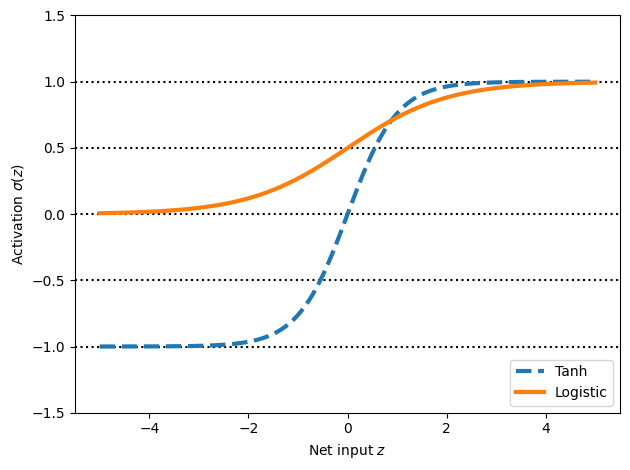

In [ ]:
import matplotlib.pyplot as plt
def tanh(z):
  return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))
z = np.arange(-5,5,0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5,1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\sigma(z)$')

# set ax horizontal line
plt.axhline(1.0, color = 'black', linestyle = ':')
plt.axhline(0.5, color = 'black', linestyle = ':')
plt.axhline(0, color = 'black', linestyle = ':')
plt.axhline(-0.5, color = 'black', linestyle = ':')
plt.axhline(-1.0, color = 'black', linestyle = ':')

# plot tanh and logistic function
plt.plot(z, tanh_act, linewidth = 3, linestyle = '--', label = 'Tanh')
plt.plot(z, log_act, linewidth = 3, label = 'Logistic')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
# 넘파이 함수 혹은 파이토치의 torch.tanh(x)함수를 사용하여 동일한 결과를 얻을 수 있음
np.tanh(z)

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])

In [ ]:
torch.tanh(torch.from_numpy(z))

tensor([-0.9999, -0.9999, -0.9999,  ...,  0.9999,  0.9999,  0.9999],
       dtype=torch.float64)

In [23]:
# 사이파이 special 모듈에도 로지스틱 함수가 있음
import scipy
from scipy.special import expit
expit(z)

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])

In [ ]:
# 시그모이드 함수 또한 마찬가지
torch.sigmoid(torch.from_numpy(z))
# Sigmoid 클래스를 활용해서도 가능
torch.nn.Sigmoid()(torch.from_numpy(z))

tensor([0.0067, 0.0067, 0.0068,  ..., 0.9932, 0.9932, 0.9933],
       dtype=torch.float64)

## 12.5.4 렐루 활성화 함수
그레디언트 소실 문제를 어느정도 해소해줌

In [24]:
# 다음과 같이 사용 가능
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)

torch.nn 모듈에서 사용할 수 있는 모든 활성화 함수는
https://pytorch.org/docs/stable/nn.functional.html
에서 확인해보자